Project Goals:

1)Analyse the present conditions in Pakistan

2)Exploration and forecast of the global COVID-19 cases using prophet by facebook. 

In [85]:
# importing the required libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

Analyzing the present conditions in Pakistan


In [86]:
# Reading the dataset
df_Pakistan= pd.read_excel("C:\\Users\\Administrator\\Desktop\\Covid cases in Pakistan.xlsx", sheet_name='TimeSeries_KeyIndicators')
df_Pakistan

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
435,8,6060,442,5480,2020-05-11 00:00:00,304,4,129.0,77,GB,5,170
436,9,19532,679,19532,2020-05-11 00:00:00,72,6,573.0,777,ICT,28,777
437,10,29463,4669,30472,2020-05-11 00:00:00,1126,245,2657.0,1270,KP,641,1270
438,11,103904,11568,130546,2020-05-11 00:00:00,4323,197,2779.0,2533,Punjab,4269,4558


In [87]:
#Analyzing the current situation with respect to confirmed no of total cases
df_Pakistan['Date'] = pd.to_datetime(df_Pakistan.Date)
df_Pakistan['Date'] = df_Pakistan['Date'].dt.strftime('%Y-%m-%d')
current_situation = df_Pakistan[df_Pakistan['Date'] == "2020-05-11"]

df_current = current_situation [['Region', 'Cumulative  Test positive', 'Expired', 'Still admitted']].reset_index(drop=True)
total_cases = current_situation['Cumulative  Test positive'].sum()
                                      
print('Total number of confirmed COVID-19 cases across Pakistan till date (11/05/2020) are', total_cases)

Total number of confirmed COVID-19 cases across Pakistan till date (11/05/2020) are 30941


In [88]:
df_current.style.background_gradient(cmap='Reds') #the darker colors indicate severe magnitude relatively

,Region,Cumulative Test positive,Expired,Still admitted
0,AJK,86,0,22
1,Balochistan,2017,26,28
2,GB,442,4,5
3,ICT,679,6,28
4,KP,4669,245,641
5,Punjab,11568,197,4269
6,Sindh,11480,189,1237


In [89]:
#Analyzing the current situation with respect to active no of total cases
current_situation['Active']=current_situation['Cumulative  Test positive'] - current_situation['Expired'] - current_situation['Discharged']
active_cases = current_situation['Active'].sum()
                                      
print('Total number of active COVID-19 cases across Pakistan till date (11/05/2020) are', active_cases)

total_cases = current_situation.groupby('Region')['Active'].sum().sort_values(ascending=False).to_frame()


Total number of active COVID-19 cases across Pakistan till date (11/05/2020) are 22062


In [90]:
total_cases.style.background_gradient(cmap='Reds')

,Active
Region,
Sindh,9210
Punjab,7048
KP,3298
Balochistan,1749
ICT,601
GB,134
AJK,22


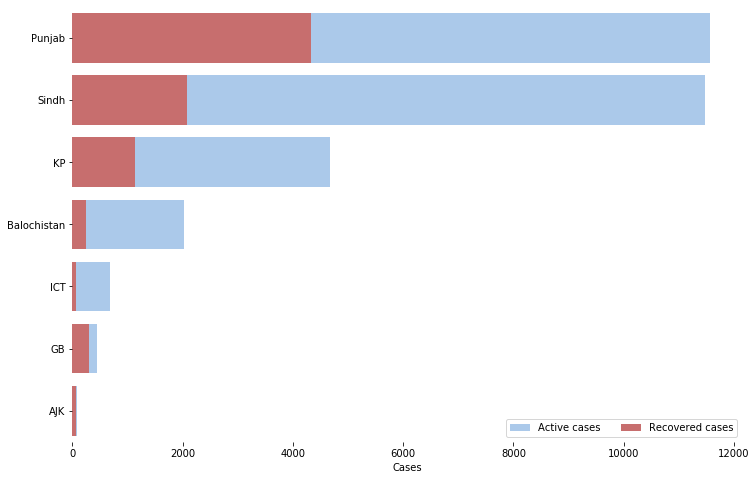

In [91]:
#comparison of active and recovered cases till date as a bar graph of the total confirmed cases
f, ax = plt.subplots(figsize=(12, 8))

data = current_situation[['Region', 'Cumulative  Test positive', 'Expired', 'Discharged']].reset_index(drop=True)
data.sort_values('Cumulative  Test positive', ascending=False, inplace=True)


sns.set_color_codes('pastel')
sns.barplot(x='Cumulative  Test positive', y='Region', data=data, label='Active cases', color='b')

sns.set_color_codes('muted')
sns.barplot(x='Discharged', y='Region', data=data, label='Recovered cases', color='r')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

In [92]:
#rise of cases in pakistan curve 


data = df_Pakistan.groupby('Date')['Cumulative  Test positive'].sum()
data = pd.DataFrame({'Date':data.index, 'Active':data.values})

fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'] ,y = data['Active'], mode='lines+markers', name='Total cases'))
fig.update_layout(title='Trend of corona virus cases in Pakistan', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

data = df_Pakistan.groupby('Date')['New  (last 24 hrs)'].sum()
data = pd.DataFrame({'Date':data.index, 'New':data.values})

fig = px.bar(data, x='Date', y='New', barmode='group', height=400)
fig.update_layout(title_text='Corona Virus suspected cases in Pakistan on daily basis', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [137]:
#Exploration of global dataset


df = pd.read_csv("C:\\Users\\Administrator\\Desktop\\covid_19_clean_complete.csv",parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

#Reading the data - Time series data with cumulative values
df_confirmed = pd.read_csv("C:\\Users\\Administrator\\Desktop\\time_series_covid19_confirmed_global.csv", header = None)
df_deaths = pd.read_csv("C:\\Users\\Administrator\\Desktop\\time_series_covid19_deaths_global.csv", header = None)
df_recovered = pd.read_csv("C:\\Users\\Administrator\\Desktop\\time_series_covid19_recovered_global.csv", header = None)

df_confirmed.rename(columns={'Country/Region':'Country','Province/State':'Province'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country','Province/State':'Province'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country','Province/State':'Province'}, inplace=True)

df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Check for Pakistan's data
df.query('Country=="Pakistan"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()




,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,454.0,2.0,13.0
58,2020-03-20,501.0,3.0,13.0
59,2020-03-21,730.0,3.0,13.0
60,2020-03-22,776.0,5.0,5.0


In [138]:
#Visualizations of global data

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [132]:
#Forecasting the future curves 

from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()




INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


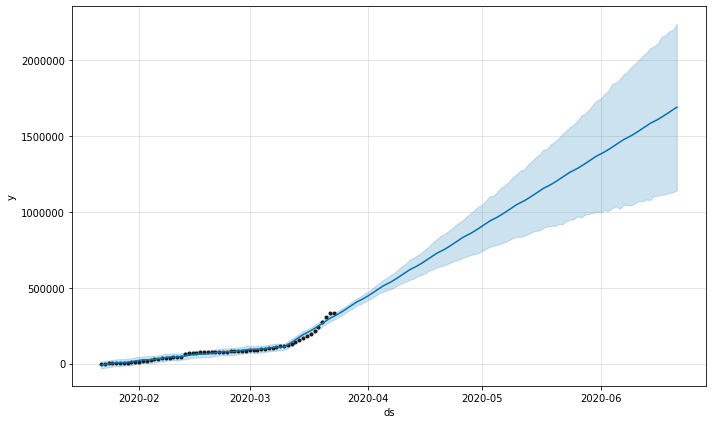

In [131]:
#confirmed cases forecast globally

confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

m = Prophet(interval_width=0.97)
m.fit(confirmed)
future = m.make_future_dataframe(periods=90)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

confirmed_forecast_plot = m.plot(forecast) # total no of confirmed cases globally

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


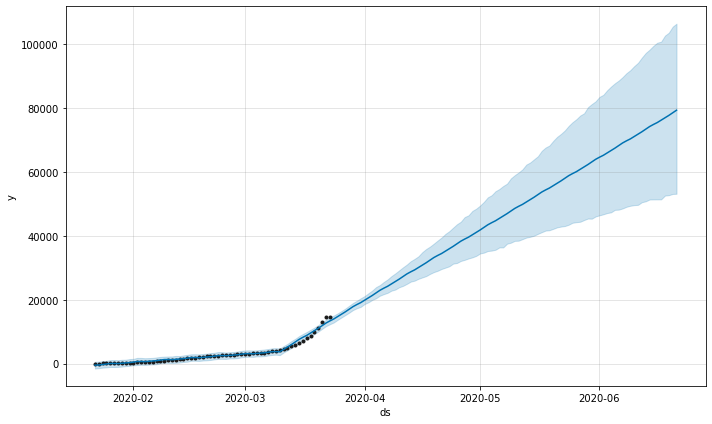

In [133]:
#death cases forecast globally

deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

m = Prophet(interval_width=0.97)
m.fit(deaths)
future = m.make_future_dataframe(periods=90)


forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

death_forecast_plot = m.plot(forecast) # total no of death cases globally

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


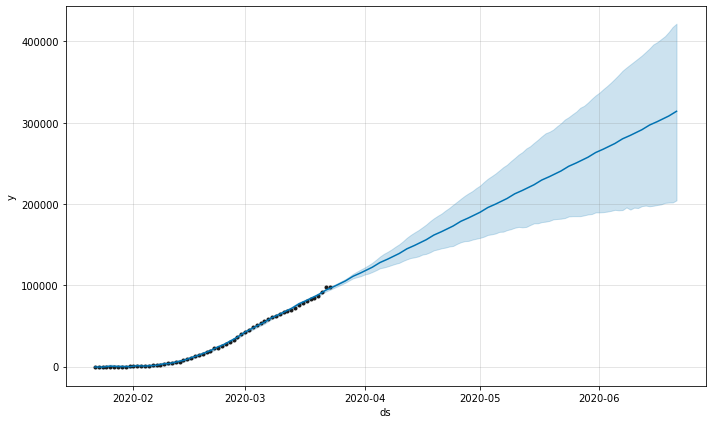

In [135]:
#recovered cases forecast globally

recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

m = Prophet(interval_width=0.97)
m.fit(recovered)
future = m.make_future_dataframe(periods=90)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

recovered_forecast_plot = m.plot(forecast) # total no of recovered cases globally